<!--NAVIGATION-->

<a href="https://colab.research.google.com/github/bpesquet/machine-learning-katas/blob/master/notebooks/katas/algorithms/LinearRegression_Scratch.ipynb"><img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab" title="Open in Google Colaboratory"></a>


## Instructions

This is a self-correcting exercise generated by [nbgrader](https://github.com/jupyter/nbgrader). 

Fill in any place that says `YOUR CODE HERE` or `YOUR ANSWER HERE`. Run subsequent cells to check your code.

---

# Kata: Code Linear Regression From Scratch

In this kata, you'll code various linear regression algorithms and compare them to some of scikit-learn's linear regressors.

## Package setup

In [1]:
# Import base packages
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Setup plots
%matplotlib inline
plt.rcParams['figure.figsize'] = 10, 8
%config InlineBackend.figure_format = 'retina'
sns.set()

In [3]:
# Import ML packages (edit this list if needed)
from sklearn.linear_model import LinearRegression, SGDRegressor

## Generate planar data

In [4]:
true_intercept = 4
true_slope = 3

# Generate linear-looking data with noise
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

# add x0 = 1 to each sample
X = np.c_[np.ones((100, 1)), X]

print(f'X: {X.shape}. y: {y.shape}')

X: (100, 2). y: (100, 1)


[0, 2, 0, 15]

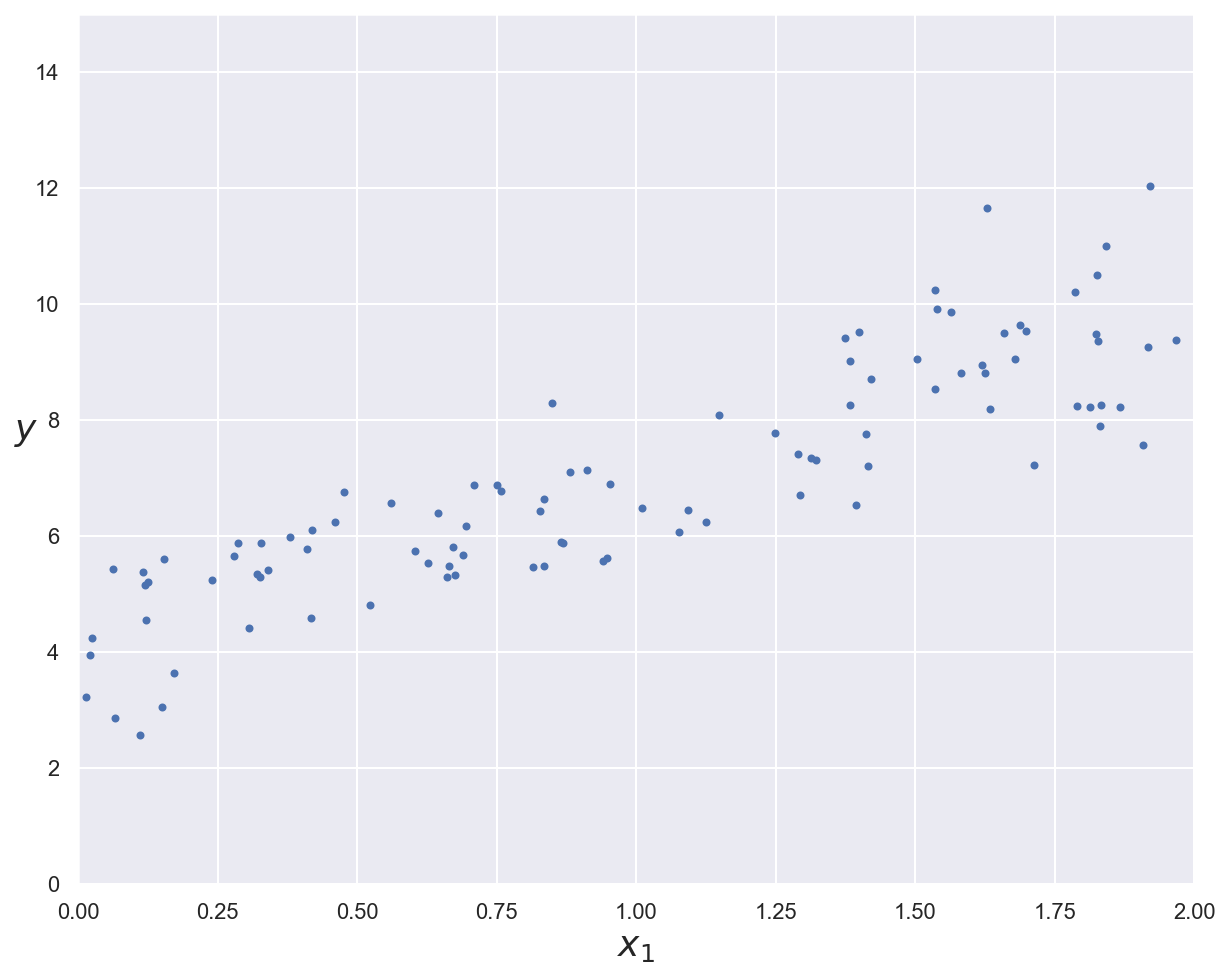

In [6]:
# Plot data (only x1)
plt.plot(X[:,1], y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0, 2, 0, 15])

## Analytical Approach

### Question

Using the normal equation, compute the theta vector that minimizes loss into the `theta_best` variable.

In [7]:
theta_best = np.dot(np.dot(np.linalg.inv(np.dot(X.T,X)),X.T),y)
print(theta_best)

[[4.1147023 ]
 [2.88243935]]


In [8]:
normal_intercept = theta_best[0][0]
normal_slope = theta_best[1][0]
print(f'Intercept: {normal_intercept}. Slope: {normal_slope}')

assert np.abs(true_intercept - normal_intercept) < 0.5
assert np.abs(true_slope - normal_slope) < 0.5

Intercept: 4.114702297297902. Slope: 2.882439351268524


In [9]:
# Generate 2 test samples
X_test = np.array([[0], [2]])

# add x0 = 1 to each sample
X_test = np.c_[np.ones((2, 1)), X_test]

### Question

Use the model to predict values for the test samples. Store the result in variable `y_pred`.

In [52]:
y_pred = (X_test * normal_slope + normal_intercept)
print(f'X_test: {X_test.shape}. y_pred: {y_pred.shape}')

X_test: (2, 2). y_pred: (2, 2)


In [53]:
print(f'y_pred: {y_pred}')

y_pred: [[6.99714165 4.1147023 ]
 [6.99714165 9.879581  ]]


[0, 2, 0, 15]

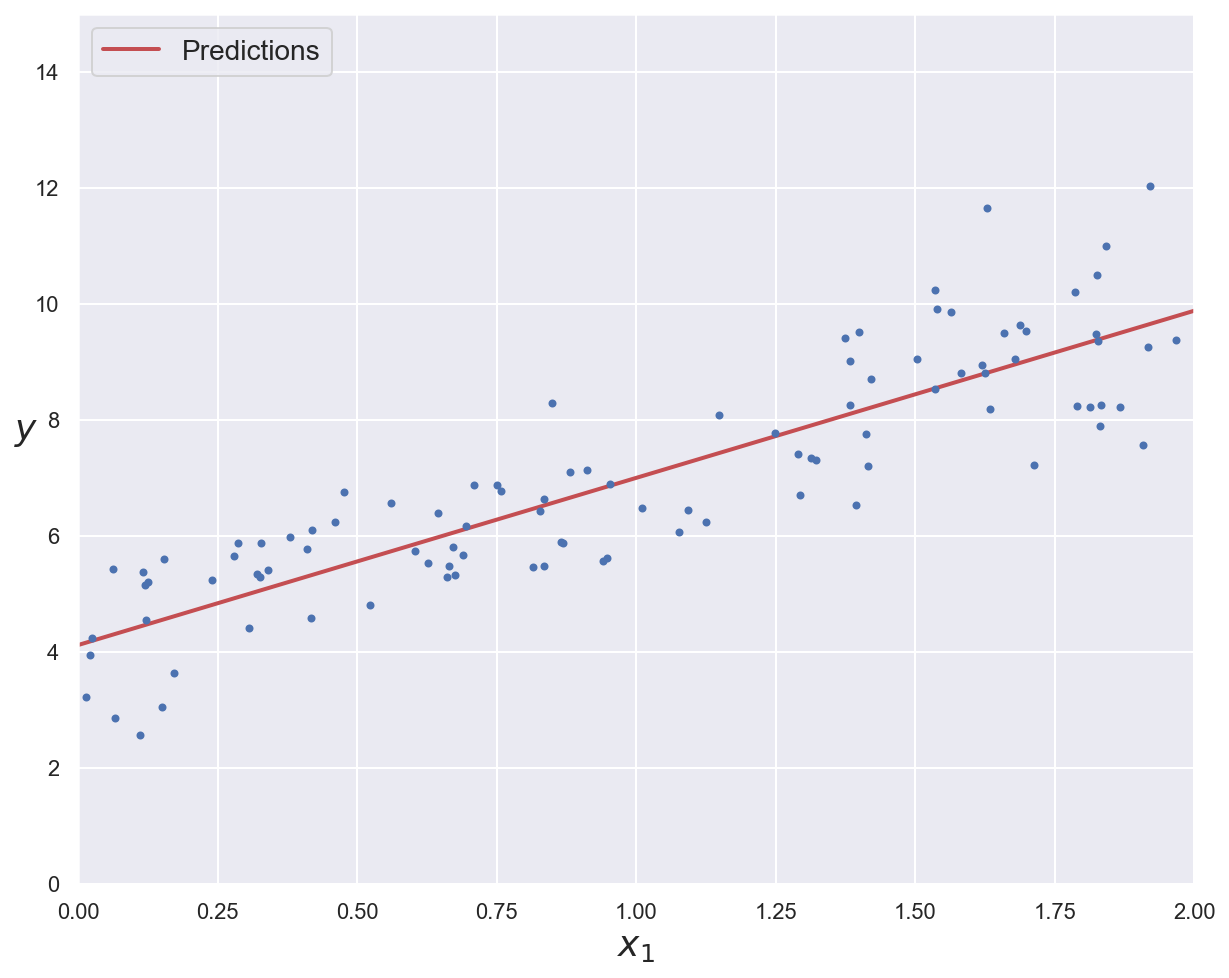

In [54]:
plt.plot(X_test[:,1], y_pred[:,1], "r-", linewidth=2, label="Predictions")
plt.plot(X[:,1], y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([0, 2, 0, 15])

### Question

Create a scikit-learn `LinearRegression` into the variable `model`. Use it to fit the data.

Afterwards, compare its paramaters to those of your regressor.

In [47]:
model = LinearRegression()
model.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [48]:
sklearn_intercept = model.intercept_[0]
sklearn_slope = model.coef_[0][1]
print(f'Intercept: {sklearn_intercept}. Slope: {sklearn_slope}')

assert np.abs(sklearn_intercept - normal_intercept) < 0.5
assert np.abs(sklearn_slope - normal_slope) < 0.5

Intercept: 4.114702297297901. Slope: 2.882439351268521


### Question

Use the scikit-learn model to predict and print values for the test samples.

[0, 2, 0, 15]

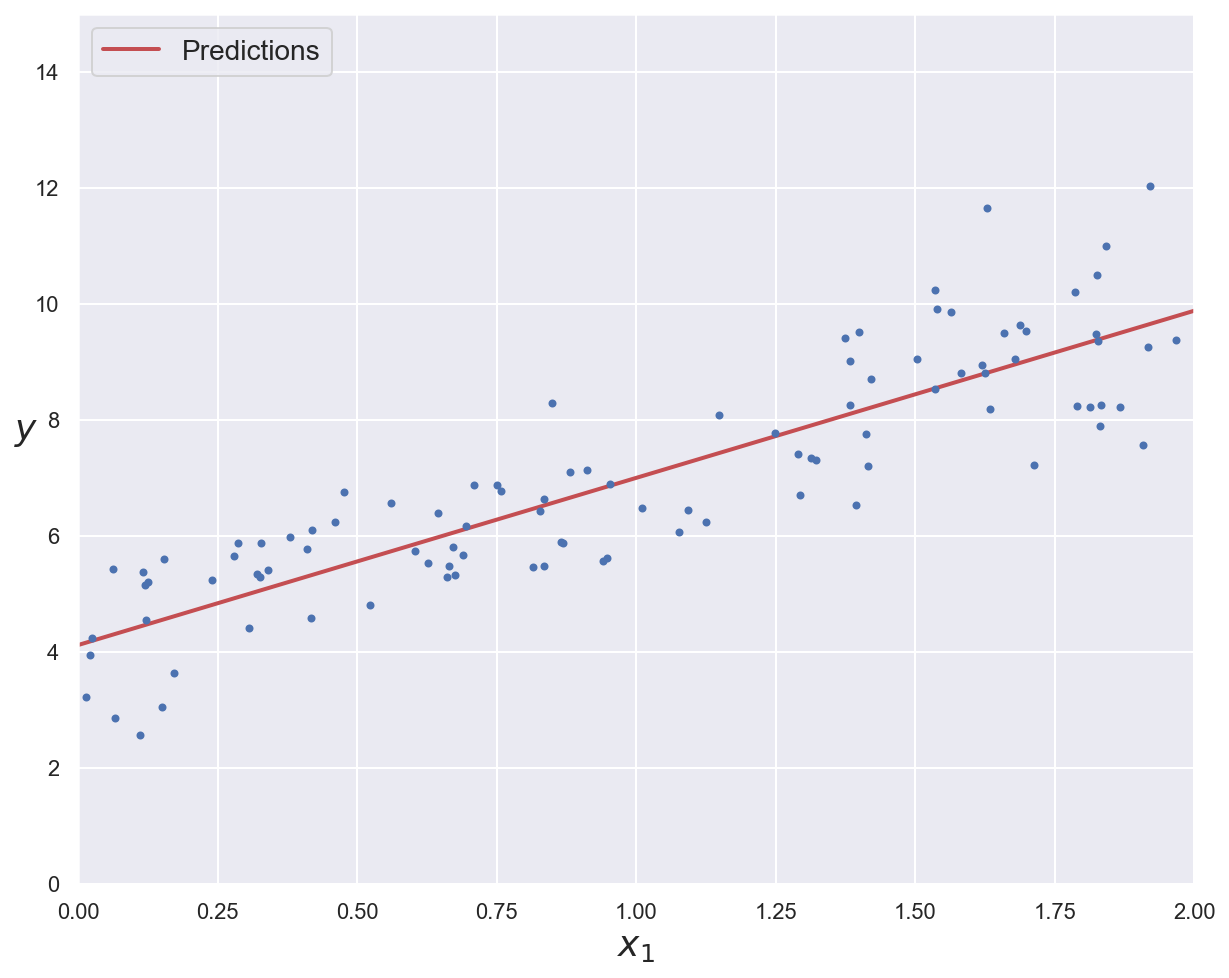

In [51]:
y_pred_linear = X_test * sklearn_slope + sklearn_intercept
plt.plot(X_test[:,1], y_pred_linear[:,1], "r-", linewidth=2, label="Predictions")
plt.plot(X[:,1], y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([0, 2, 0, 15])

## Iterative Approach: Batch Gradient Descent

### Question

Complte the following function to implement Mean Squared Error loss.

In [105]:
def mse(y_true, y_pred):
    return np.mean(np.power(y_pred-y_true,2))

MSE_homemade_pred = mse(y, y_pred[:,1])
MSE_skt_pred = mse(y, y_pred_linear[:,1])
print(f'MSE_homemade: {MSE_homemade_pred}')
print(f'MSE_skt: {MSE_skt_pred}')

MSE_homemade: 12.224355159464753
MSE_skt: 12.224355159464737


### Question

Complte the following code to implement batch gradient descent on the dataset, using the given hyperparameters.

Print the loss value every 10 iterations.

In [106]:
eta = 0.1 # learning rate
n_iterations = 100
m = 100

theta_batch = np.random.randn(2,1) # random initialization
print(f'Initial cost: {mse(y, X.dot(theta_batch))}')
def batch_grad(theta, X, eta, n_iterations, m):
    for i in range(n_iterations):
        grad_theta = (2/m)*X.T.dot(X.dot(theta)-y)
        theta = theta - eta * grad_theta
        if i%25==0:
            print(f'Inter cost: {mse(y, X.dot(theta))}')
    return theta
theta_batch = batch_grad(theta_batch, X, eta, n_iterations, m)

Initial cost: 38.58632855357797
Inter cost: 14.190588905236774
Inter cost: 1.281056692746987
Inter cost: 0.9835334986991309
Inter cost: 0.9282845940238318


In [92]:
batch_intercept = theta_batch[0][0]
batch_slope = theta_batch[1][0]
print(f'Intercept: {batch_intercept}. Slope: {batch_slope}')

assert np.abs(true_intercept - batch_intercept) < 0.5
assert np.abs(true_slope - batch_slope) < 0.5

Intercept: 4.099834080764728. Slope: 2.8949383676252767


## Iterative Approach: Stochastic Gradient Descent

### Question

Complte the following code to implement stochastic gradient descent on the dataset, using the given hyperparameters.

Print the loss value every 25 iterations.

In [133]:
eta = 0.01 # learning rate
n_iterations = 5000
m = 100

theta_stochastic = np.random.randn(2,1) # random initialization
print(f'Initial cost: {mse(y, X.dot(theta_stochastic))}')

def stochastic_grad(theta, X, eta, n_iterations, m):
    for i in range(n_iterations):
        indice = np.random.randint(m)
        grad_theta = 2*(X[indice].T).dot(X[indice].dot(theta)-y[indice])
        theta = theta - eta * grad_theta
        if i%25==0:
            print(f'Inter cost: {mse(y, X[indice].dot(theta))}')
    return theta
theta_batch = stochastic_grad(theta_stochastic, X, eta, n_iterations, m)

Initial cost: 81.68470945991457


ValueError: shapes (2,) and (1,) not aligned: 2 (dim 0) != 1 (dim 0)

In [97]:
stochastic_intercept = theta_batch[0][0]
stochastic_slope = theta_batch[1][0]
print(f'Intercept: {stochastic_intercept}. Slope: {stochastic_slope}')

assert np.abs(true_intercept - stochastic_intercept) < 0.5
assert np.abs(true_slope - stochastic_slope) < 0.5

Intercept: 4.099834080764728. Slope: 2.8949383676252767


### Question

Create a scikit-learn `SGDRegressor` into the variable `model`. Use it to fit the data with the same hyperparameters as before.

Afterwards, compare its paramaters to those of your regressor.

In [ ]:
# YOUR CODE HERE

In [ ]:
sklearn_intercept = model.intercept_[0]
sklearn_slope = model.coef_[0][1]
print(f'Intercept: {sklearn_intercept}. Slope: {sklearn_slope}')

assert np.abs(sklearn_intercept - normal_intercept) < 0.5
assert np.abs(sklearn_slope - normal_slope) < 0.5

## TODO

- Add assertions for model predictions.
- Implement mini-batch SGD.